In [1]:
# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# main
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import scipy as sp

# misc
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('PitcherData.csv')
fb_data = data[data['PitchType']=='FB']
fb_data

,GameId,Role,PitcherHandedness,Delivery,ReleaseSpeed,ZoneSpeed,PitchVerticalApproachAngle,ReleaseExtension,ReleaseHeight,ReleaseSide,ArmAngleBR,ArmSlotBR,StrideLength,StrideLengthPercentHeight,StrideWidth,TimeToPlate,PeakHipsVeloX,PeakPitchHandVeloX,DLHipRotMin,HSSepMin,PARotMax,PAScapRetMin,SLKneeFlexFP,PAElbowFlexBR,SLKneeFlexBR,TorsoFBBR,TorsoSBBR,PeakMomDL,PeakMomSL,PeakMomTorso,PeakMomLFA,PeakMomLUA,PeakMomPFA,PeakMomPUA,PeakMomTotalBody,PeakMomTimeDL,PeakMomTimeSL,PeakMomTimeTorso,PeakMomTimeLFA,PeakMomTimeLUA,PeakMomTimePFA,PeakMomTimePUA,PeakMomTimeTotalBody,PeakPelvisRotVelo,PeakPelvisRotVeloTime,PeakChestRotVelo,PeakChestRotVeloTime,PeakElbowExtVelo,PeakElbowExtVeloTime,PeakShoulderIRVelo,PeakShoulderIRVeloTime,PelvisChestPeakTimeDiff,PeakSLKneeExtVelo,ClosingSpeed,ClosingTime,TimeFirstMove,TimeHandSeparation,TimePeakKneeLift,TimeFootPlant,TimeMER,PitchType,SpinRate,SpinDirection,InducedVertBreak,SpinEfficiency,PitchCount
0,717247,Pitcher,R,WU,92.883598,85.358162,-5.26402,7.200283,5.68847,-1.32301,104.899590,45.482530,6.234744,0.959191,0.480582,1.794048,9.999728,74.488926,-57.704386,-59.436962,184.867034,-26.459514,33.558428,46.156729,61.829131,35.014744,-19.803716,59.076818,65.505386,178.474295,14.589029,20.879261,25.940629,33.364805,316.155373,-0.225082,-0.278411,-0.071761,-0.118424,-0.115091,-0.005100,-0.051763,-0.078427,580.134192,-0.138422,1051.790412,-0.098426,1551.117321,-0.008433,2739.631800,0.014898,0.039996,-95.431603,519.237125,0.136655,-1.378319,-0.498392,-0.841697,-0.151755,-0.031765,FB,2010.934814,198.274002,15.237906,0.981800,1
1,716775,Pitcher,R,WU,92.162498,82.678711,-5.50739,7.074602,5.78597,-1.85525,97.735704,45.769597,5.785254,0.890039,0.457357,1.727100,9.242676,73.800552,-57.276927,-57.582635,183.756854,-48.689772,36.399829,48.956994,63.961833,33.845853,-20.061510,58.735936,61.773624,156.940774,14.079443,19.891426,25.076940,32.904583,301.055415,-0.198722,-0.422037,-0.125395,-0.148726,-0.118729,-0.002071,-0.048734,-0.135394,496.175175,-0.158725,1027.137579,-0.102063,1415.418660,-0.012071,3244.898378,0.011261,0.056662,-83.259474,466.447877,0.143322,-1.301965,-0.532028,-0.802006,-0.155392,-0.035402,FB,1991.656250,186.020004,18.172521,0.969281,1
8,717299,Pitcher,R,WU,91.378700,83.668266,-3.70165,6.875530,5.66476,-1.37897,97.114659,42.408580,6.060844,0.932438,0.405218,1.779110,9.475445,73.169206,-57.308310,-57.557926,184.333399,-34.443572,38.298648,49.580683,60.398162,33.120254,-20.749445,61.317375,60.142862,161.546742,13.645543,20.433823,25.186175,33.308831,313.563339,-0.205784,-0.289110,-0.135790,-0.119125,-0.119125,-0.012467,-0.045797,-0.139123,456.371579,-0.119125,1045.288974,-0.109125,1554.703469,-0.009134,3038.282142,0.014198,0.010000,-92.180262,477.177261,0.153320,-1.355687,-0.509092,-0.835731,-0.135790,-0.035798,FB,2106.927734,200.289993,18.239483,0.967735,1
9,717442,Pitcher,R,WU,94.797997,86.015198,-4.85433,7.120858,5.65724,-1.32767,93.610172,39.368485,6.122093,0.941860,0.386986,1.692899,9.173078,75.840522,-55.105948,-58.807858,181.659823,-31.512376,48.603188,49.594111,48.481361,35.040876,-20.347328,55.267417,63.746550,160.567349,13.682870,20.536097,25.278245,33.548653,301.066706,-0.202521,-0.359173,-0.122528,-0.115862,-0.112529,-0.005872,-0.049201,-0.135860,506.952667,-0.125861,1048.236004,-0.099197,1541.809433,-0.005872,3254.025953,0.014126,0.026664,-117.239887,483.774543,0.146653,-1.282426,-0.482495,-0.809133,-0.089198,-0.032536,FB,2181.846680,192.001999,15.462215,0.946546,1
10,717299,Pitcher,R,WU,91.773499,84.278610,-5.13359,7.262164,5.67507,-1.53378,103.514995,45.796271,6.146240,0.945575,0.362848,1.771532,9.675753,75.468733,-58.000013,-57.375427,184.707496,-32.974904,38.112980,47.024741,62.273515,33.439625,-20.685694,61.908161,64.825324,166.495962,13.436391,19.730564,25.970697,33.177811,328.538237,-0.206290,-0.372942,-0.136297,-0.122964,-0.116298,-0.006308,-0.046305,-0.139629,451.663097,-0.119631,1044.058813,-0.106299,1734.323423,-0.006308,3391.059334,0.017023,0.013332,-10.418899,517.529

In [3]:
fb_data.isna().sum()[fb_data.isna().sum()>0]

ReleaseExtension      1
PeakMomDL             1
PeakMomTimeSL         1
PeakMomTimeTorso      1
TimeHandSeparation    1
SpinEfficiency        1
dtype: int64

In [4]:
fb_data = fb_data.dropna()

<Axes: >

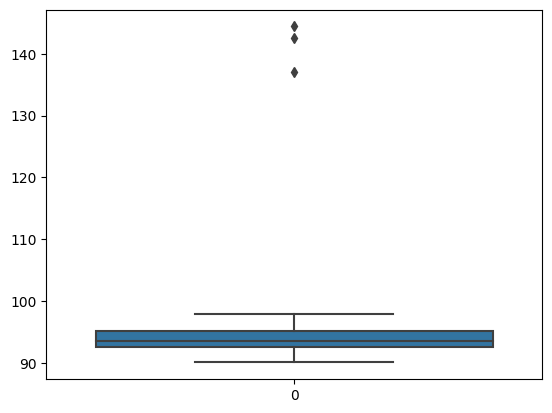

In [5]:
sns.boxplot(fb_data['ReleaseSpeed'])

In [6]:
fb_data = fb_data[fb_data['ReleaseSpeed']<110]

<Axes: >

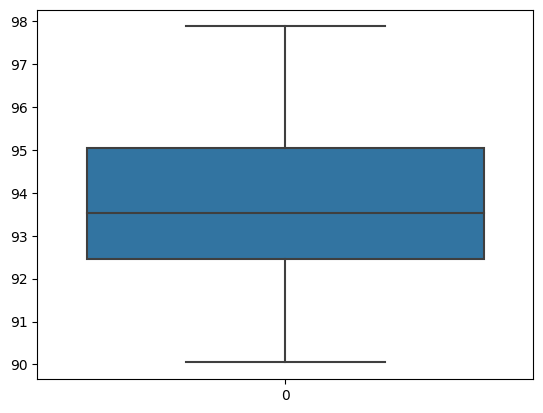

In [7]:
sns.boxplot(fb_data['ReleaseSpeed'])

In [8]:
fb_data['ReleaseSpeed'].describe()

count    84.000000
mean     93.713748
std       1.790265
min      90.047096
25%      92.461527
50%      93.520451
75%      95.049248
max      97.876701
Name: ReleaseSpeed, dtype: float64

In [9]:
fb_data['PitcherHandedness'].value_counts()

R    84
Name: PitcherHandedness, dtype: int64

In [10]:
fb_data['Delivery'].value_counts()

WU    72
S     12
Name: Delivery, dtype: int64

<Axes: xlabel='Delivery', ylabel='ReleaseSpeed'>

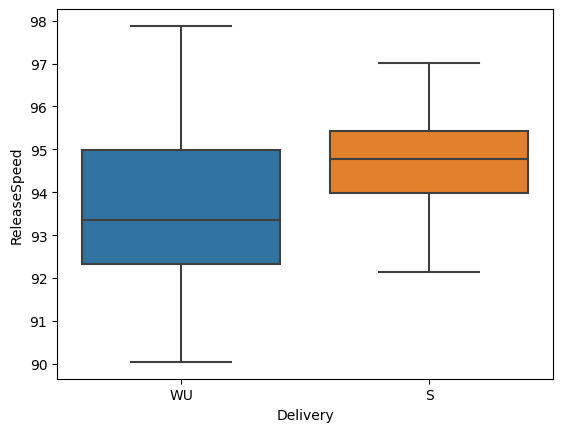

In [11]:
sns.boxplot(y = 'ReleaseSpeed', x ='Delivery', data=fb_data)

In [12]:
fb_data = fb_data.drop(columns=['GameId','Role','PitcherHandedness','ZoneSpeed'])
fb_data

,Delivery,ReleaseSpeed,PitchVerticalApproachAngle,ReleaseExtension,ReleaseHeight,ReleaseSide,ArmAngleBR,ArmSlotBR,StrideLength,StrideLengthPercentHeight,StrideWidth,TimeToPlate,PeakHipsVeloX,PeakPitchHandVeloX,DLHipRotMin,HSSepMin,PARotMax,PAScapRetMin,SLKneeFlexFP,PAElbowFlexBR,SLKneeFlexBR,TorsoFBBR,TorsoSBBR,PeakMomDL,PeakMomSL,PeakMomTorso,PeakMomLFA,PeakMomLUA,PeakMomPFA,PeakMomPUA,PeakMomTotalBody,PeakMomTimeDL,PeakMomTimeSL,PeakMomTimeTorso,PeakMomTimeLFA,PeakMomTimeLUA,PeakMomTimePFA,PeakMomTimePUA,PeakMomTimeTotalBody,PeakPelvisRotVelo,PeakPelvisRotVeloTime,PeakChestRotVelo,PeakChestRotVeloTime,PeakElbowExtVelo,PeakElbowExtVeloTime,PeakShoulderIRVelo,PeakShoulderIRVeloTime,PelvisChestPeakTimeDiff,PeakSLKneeExtVelo,ClosingSpeed,ClosingTime,TimeFirstMove,TimeHandSeparation,TimePeakKneeLift,TimeFootPlant,TimeMER,PitchType,SpinRate,SpinDirection,InducedVertBreak,SpinEfficiency,PitchCount
0,WU,92.883598,-5.26402,7.200283,5.68847,-1.32301,104.899590,45.482530,6.234744,0.959191,0.480582,1.794048,9.999728,74.488926,-57.704386,-59.436962,184.867034,-26.459514,33.558428,46.156729,61.829131,35.014744,-19.803716,59.076818,65.505386,178.474295,14.589029,20.879261,25.940629,33.364805,316.155373,-0.225082,-0.278411,-0.071761,-0.118424,-0.115091,-0.005100,-0.051763,-0.078427,580.134192,-0.138422,1051.790412,-0.098426,1551.117321,-0.008433,2739.631800,0.014898,0.039996,-95.431603,519.237125,0.136655,-1.378319,-0.498392,-0.841697,-0.151755,-0.031765,FB,2010.934814,198.274002,15.237906,0.981800,1
1,WU,92.162498,-5.50739,7.074602,5.78597,-1.85525,97.735704,45.769597,5.785254,0.890039,0.457357,1.727100,9.242676,73.800552,-57.276927,-57.582635,183.756854,-48.689772,36.399829,48.956994,63.961833,33.845853,-20.061510,58.735936,61.773624,156.940774,14.079443,19.891426,25.076940,32.904583,301.055415,-0.198722,-0.422037,-0.125395,-0.148726,-0.118729,-0.002071,-0.048734,-0.135394,496.175175,-0.158725,1027.137579,-0.102063,1415.418660,-0.012071,3244.898378,0.011261,0.056662,-83.259474,466.447877,0.143322,-1.301965,-0.532028,-0.802006,-0.155392,-0.035402,FB,1991.656250,186.020004,18.172521,0.969281,1
8,WU,91.378700,-3.70165,6.875530,5.66476,-1.37897,97.114659,42.408580,6.060844,0.932438,0.405218,1.779110,9.475445,73.169206,-57.308310,-57.557926,184.333399,-34.443572,38.298648,49.580683,60.398162,33.120254,-20.749445,61.317375,60.142862,161.546742,13.645543,20.433823,25.186175,33.308831,313.563339,-0.205784,-0.289110,-0.135790,-0.119125,-0.119125,-0.012467,-0.045797,-0.139123,456.371579,-0.119125,1045.288974,-0.109125,1554.703469,-0.009134,3038.282142,0.014198,0.010000,-92.180262,477.177261,0.153320,-1.355687,-0.509092,-0.835731,-0.135790,-0.035798,FB,2106.927734,200.289993,18.239483,0.967735,1
9,WU,94.797997,-4.85433,7.120858,5.65724,-1.32767,93.610172,39.368485,6.122093,0.941860,0.386986,1.692899,9.173078,75.840522,-55.105948,-58.807858,181.659823,-31.512376,48.603188,49.594111,48.481361,35.040876,-20.347328,55.267417,63.746550,160.567349,13.682870,20.536097,25.278245,33.548653,301.066706,-0.202521,-0.359173,-0.122528,-0.115862,-0.112529,-0.005872,-0.049201,-0.135860,506.952667,-0.125861,1048.236004,-0.099197,1541.809433,-0.005872,3254.025953,0.014126,0.026664,-117.239887,483.774543,0.146653,-1.282426,-0.482495,-0.809133,-0.089198,-0.032536,FB,2181.846680,192.001999,15.462215,0.946546,1
10,WU,91.773499,-5.13359,7.262164,5.67507,-1.53378,103.514995,45.796271,6.146240,0.945575,0.362848,1.771532,9.675753,75.468733,-58.000013,-57.375427,184.707496,-32.974904,38.112980,47.024741,62.273515,33.439625,-20.685694,61.908161,64.825324,166.495962,13.436391,19.730564,25.970697,33.177811,328.538237,-0.206290,-0.372942,-0.136297,-0.122964,-0.116298,-0.006308,-0.046305,-0.139629,451.663097,-0.119631,1044.058813,-0.106299,1734.323423,-0.006308,3391.059334,0.017023,0.013332,-10.418899,517.529329,0.146654,-1.349521,-0.489598,-0.809569,-0.139629,-0.032972,FB,2107.554443,199.561996,16.443963,0.960171,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Pitcher Release and Arm data

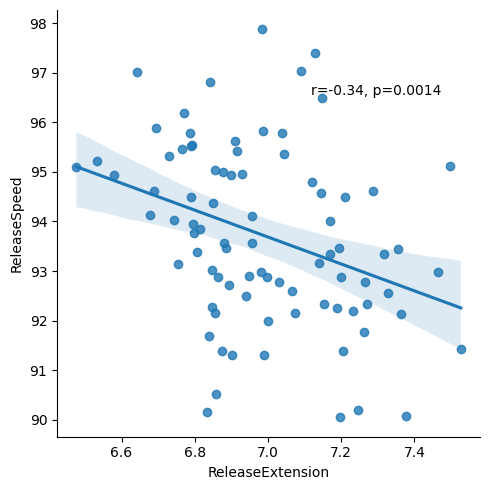

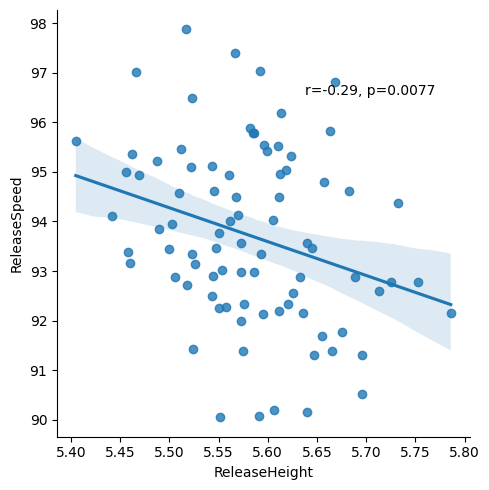

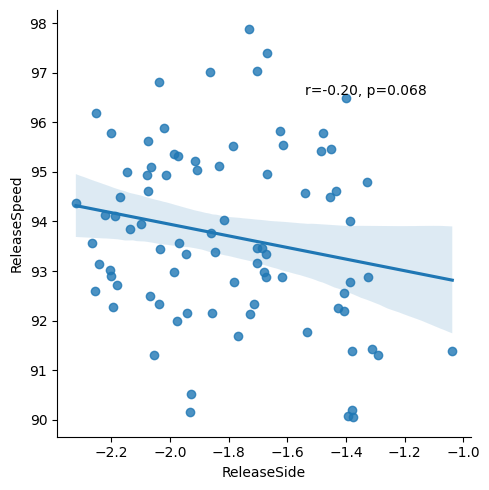

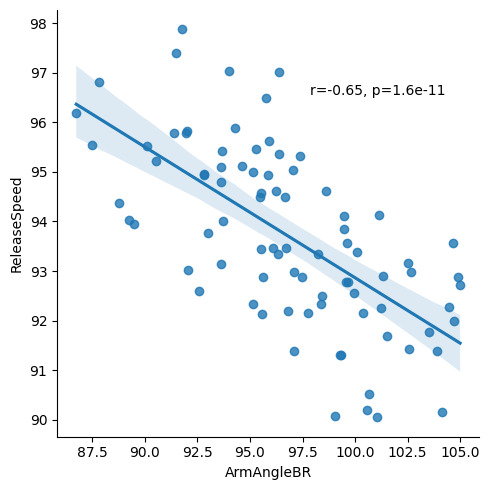

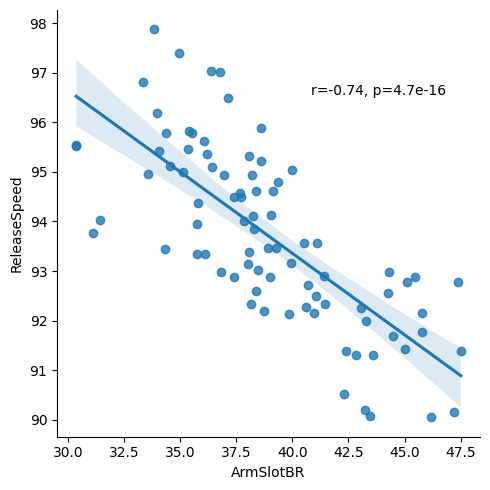

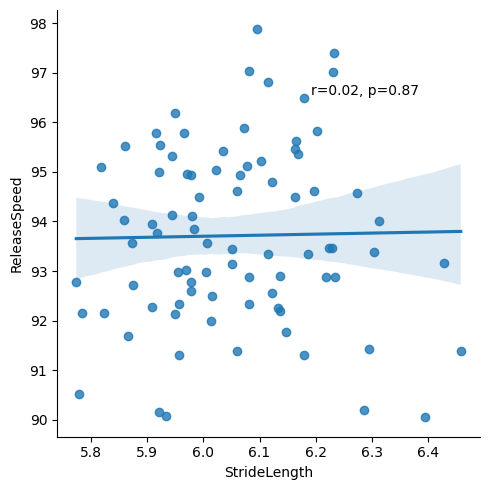

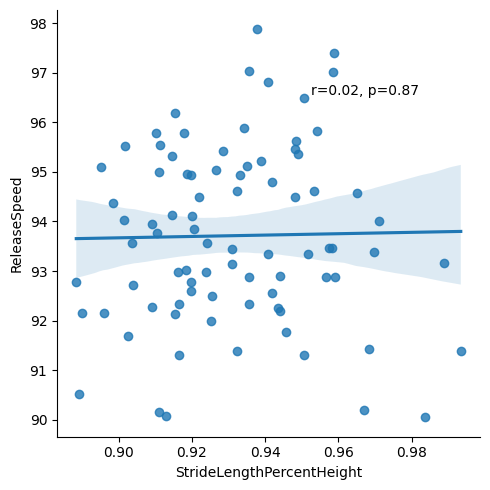

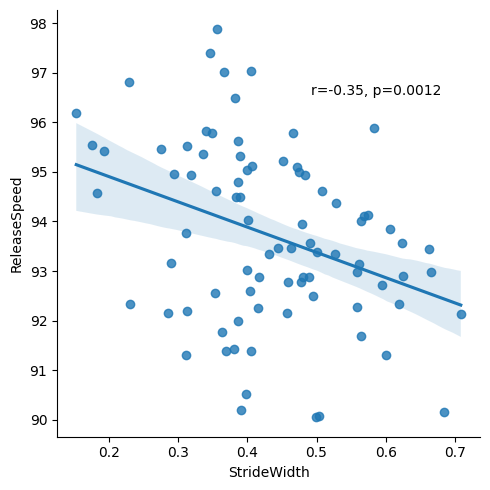

In [13]:
pitcher_vars = ['ReleaseExtension','ReleaseHeight','ReleaseSide','ArmAngleBR','ArmSlotBR','StrideLength','StrideLengthPercentHeight','StrideWidth']

for c in pitcher_vars:
    g = sns.lmplot(x=c, y='ReleaseSpeed', data=fb_data)
    def annotate(data, **kws):
        r, p = sp.stats.pearsonr(fb_data[c], fb_data['ReleaseSpeed'])
        ax = plt.gca()
        ax.text(0.6, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)
    g.map_dataframe(annotate)
    plt.show()

## Kinematic data

knee flexion at ball release is low for faster velocity which means your knee is extending more

mention outliers in dlh

torsosbbr mild positive corr --> could be because of arm slot relationship seen above

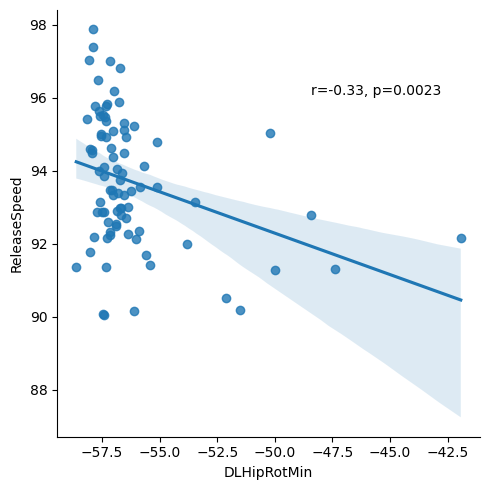

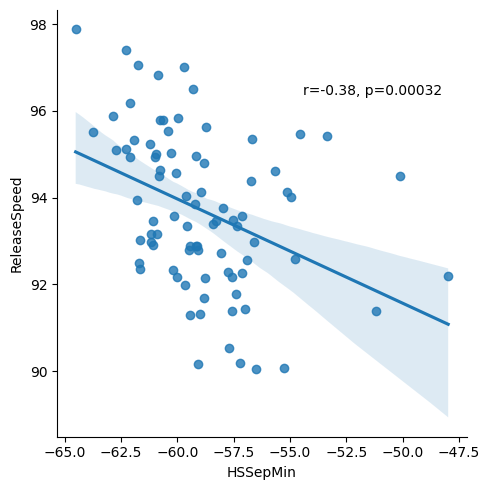

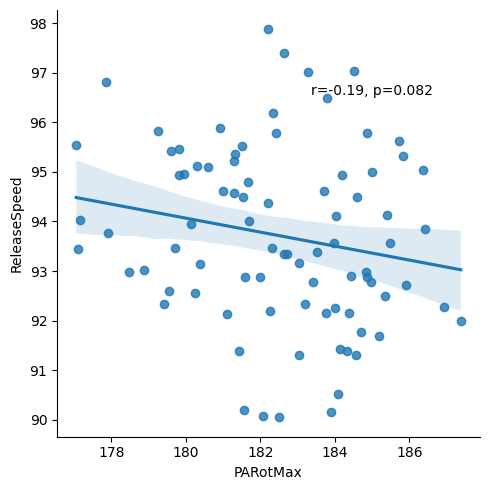

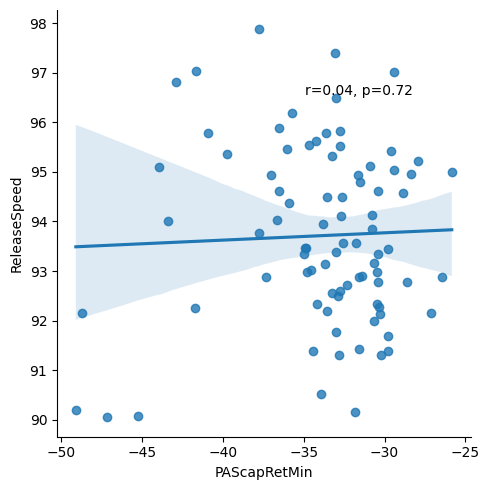

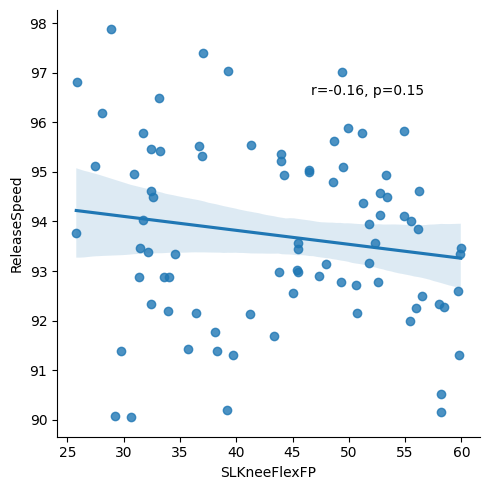

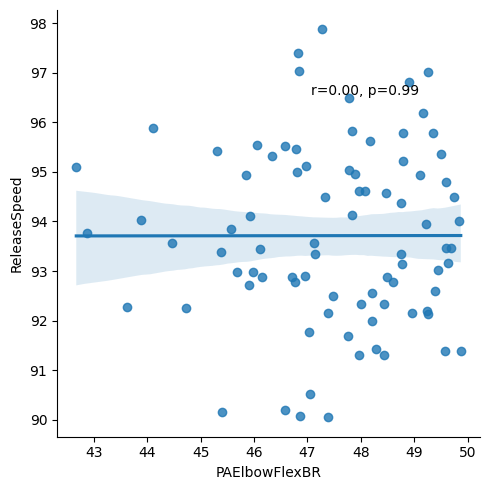

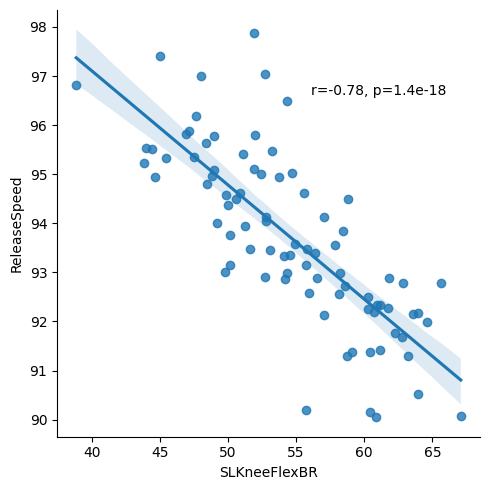

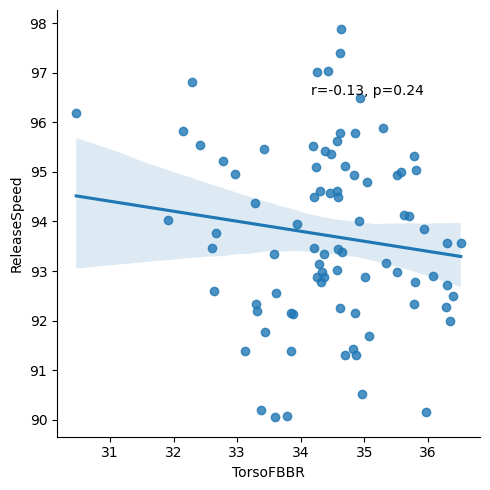

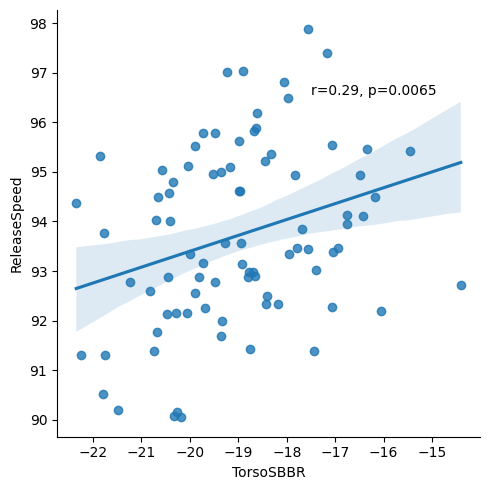

In [14]:
kinematic_vars = ['DLHipRotMin','HSSepMin', 'PARotMax', 'PAScapRetMin', 'SLKneeFlexFP', 'PAElbowFlexBR','SLKneeFlexBR', 'TorsoFBBR', 'TorsoSBBR']

for c in kinematic_vars:
    g = sns.lmplot(x=c, y='ReleaseSpeed', data=fb_data)
    def annotate(data, **kws):
        r, p = sp.stats.pearsonr(fb_data[c], fb_data['ReleaseSpeed'])
        ax = plt.gca()
        ax.text(0.6, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)
    g.map_dataframe(annotate)
    plt.show()

## Kinetic data

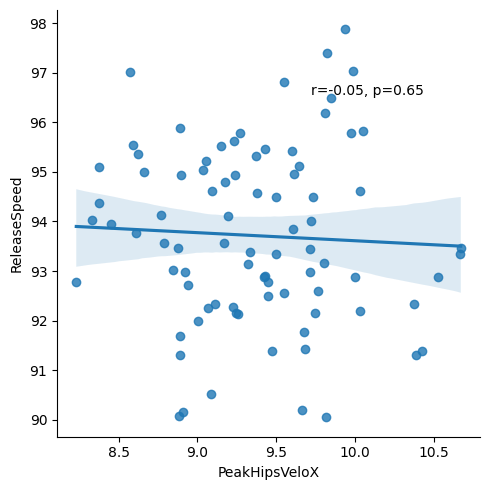

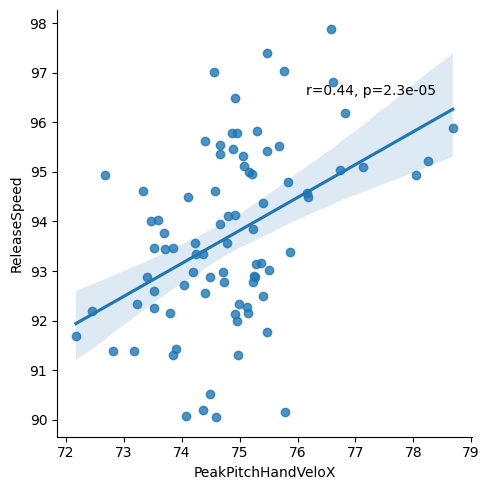

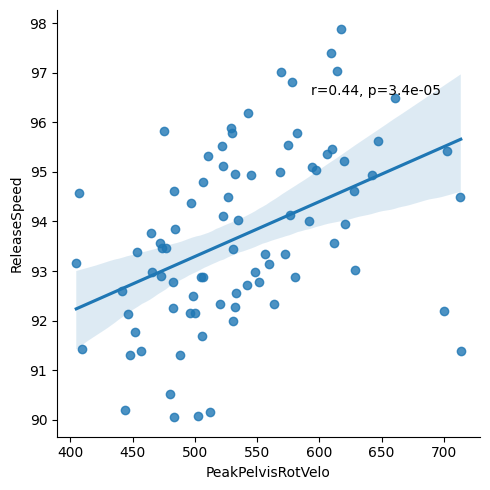

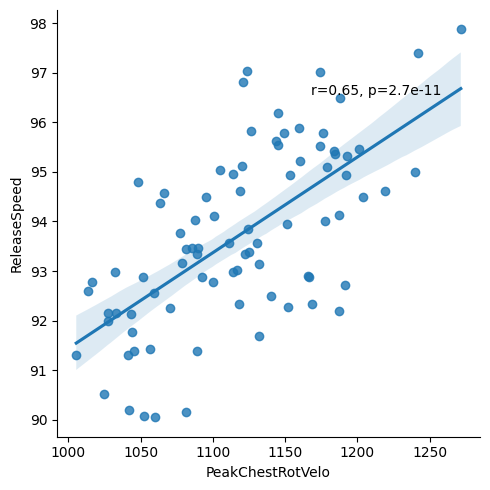

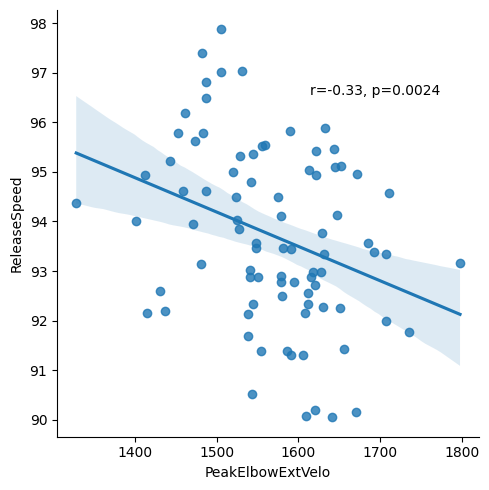

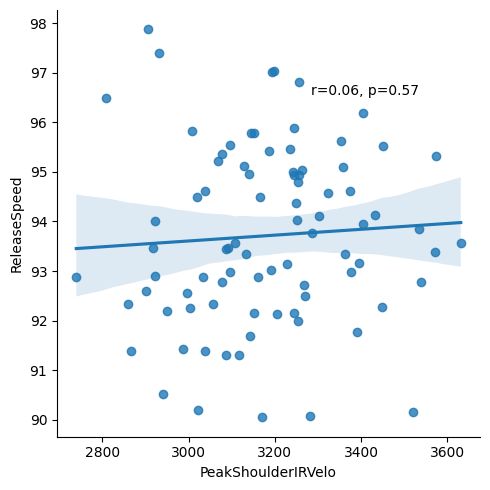

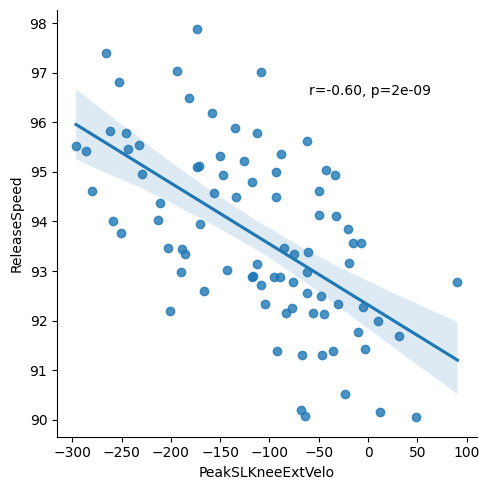

In [15]:
kinetic_vars = ['PeakHipsVeloX', 'PeakPitchHandVeloX','PeakPelvisRotVelo', 'PeakChestRotVelo', 'PeakElbowExtVelo', 'PeakShoulderIRVelo','PeakSLKneeExtVelo']

for c in kinetic_vars:
    g = sns.lmplot(x=c, y='ReleaseSpeed', data=fb_data)
    def annotate(data, **kws):
        r, p = sp.stats.pearsonr(fb_data[c], fb_data['ReleaseSpeed'])
        ax = plt.gca()
        ax.text(0.6, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)
    g.map_dataframe(annotate)
    plt.show()

whenever this pitcher is planting his foot, we want him to continue with the flexion after footplant (becasue we see this pslkfv is positive, we see a higher velocity). With the flexion after footplant, eventually you want the pitcher to extend during ball release (because in the prev section we see, the more extended the knee at ball release is the better velocity

basically this pitcher throws faster whenever his stride knee sinks alittle bit after foot plant to eventually be extended at ball release 

## Momentum data

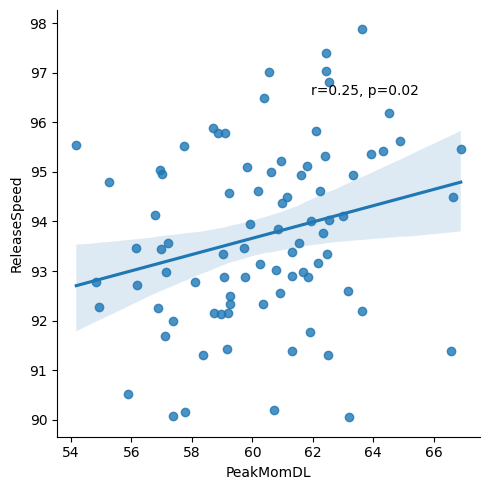

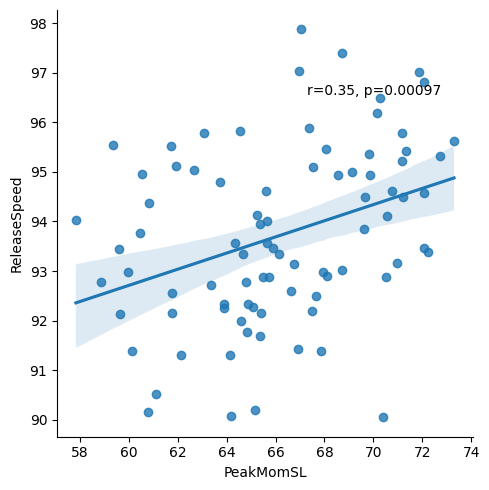

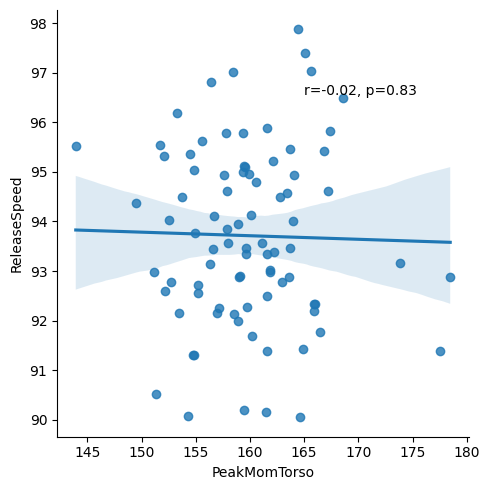

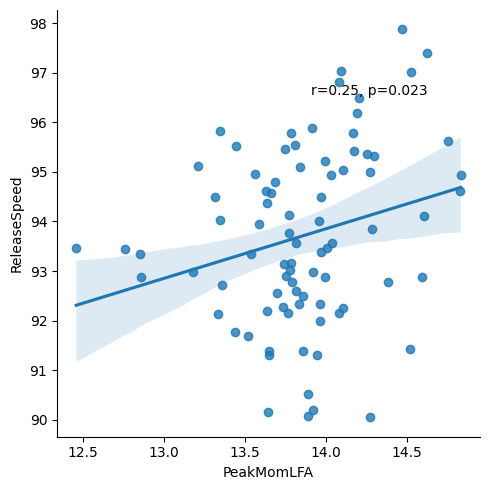

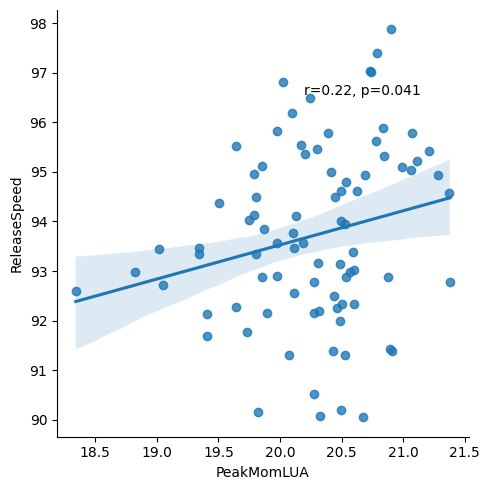

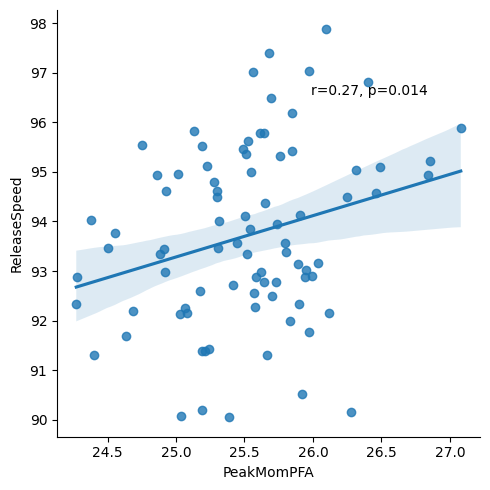

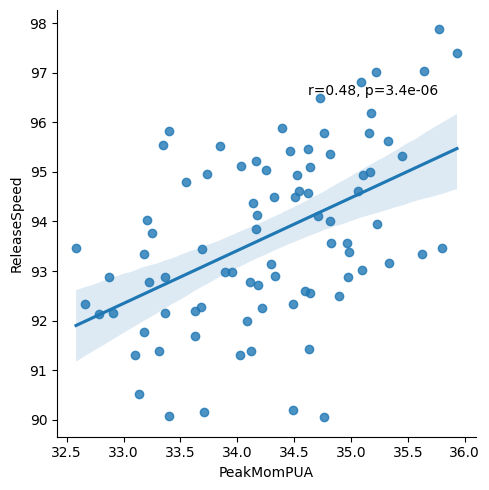

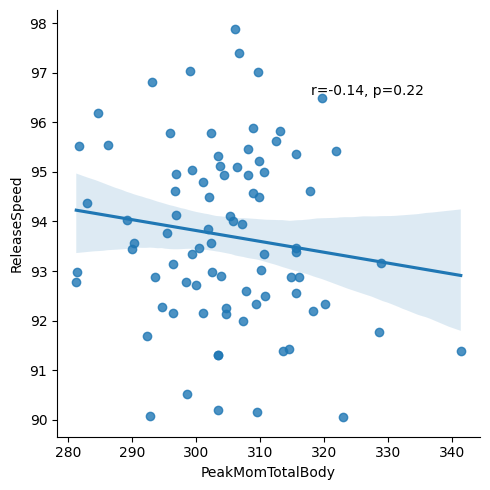

In [16]:
momentum_vars = ['PeakMomDL', 'PeakMomSL', 'PeakMomTorso', 'PeakMomLFA', 'PeakMomLUA', 'PeakMomPFA', 'PeakMomPUA', 'PeakMomTotalBody']

for c in momentum_vars:
    g = sns.lmplot(x=c, y='ReleaseSpeed', data=fb_data)
    def annotate(data, **kws):
        r, p = sp.stats.pearsonr(fb_data[c], fb_data['ReleaseSpeed'])
        ax = plt.gca()
        ax.text(0.6, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)
    g.map_dataframe(annotate)
    plt.show()

## Timing data

In [17]:
fb_data.columns

Index(['Delivery', 'ReleaseSpeed', 'PitchVerticalApproachAngle',
       'ReleaseExtension', 'ReleaseHeight', 'ReleaseSide', 'ArmAngleBR',
       'ArmSlotBR', 'StrideLength', 'StrideLengthPercentHeight', 'StrideWidth',
       'TimeToPlate', 'PeakHipsVeloX', 'PeakPitchHandVeloX', 'DLHipRotMin',
       'HSSepMin', 'PARotMax', 'PAScapRetMin', 'SLKneeFlexFP', 'PAElbowFlexBR',
       'SLKneeFlexBR', 'TorsoFBBR', 'TorsoSBBR', 'PeakMomDL', 'PeakMomSL',
       'PeakMomTorso', 'PeakMomLFA', 'PeakMomLUA', 'PeakMomPFA', 'PeakMomPUA',
       'PeakMomTotalBody', 'PeakMomTimeDL', 'PeakMomTimeSL',
       'PeakMomTimeTorso', 'PeakMomTimeLFA', 'PeakMomTimeLUA',
       'PeakMomTimePFA', 'PeakMomTimePUA', 'PeakMomTimeTotalBody',
       'PeakPelvisRotVelo', 'PeakPelvisRotVeloTime', 'PeakChestRotVelo',
       'PeakChestRotVeloTime', 'PeakElbowExtVelo', 'PeakElbowExtVeloTime',
       'PeakShoulderIRVelo', 'PeakShoulderIRVeloTime',
       'PelvisChestPeakTimeDiff', 'PeakSLKneeExtVelo', 'ClosingSpeed',
       

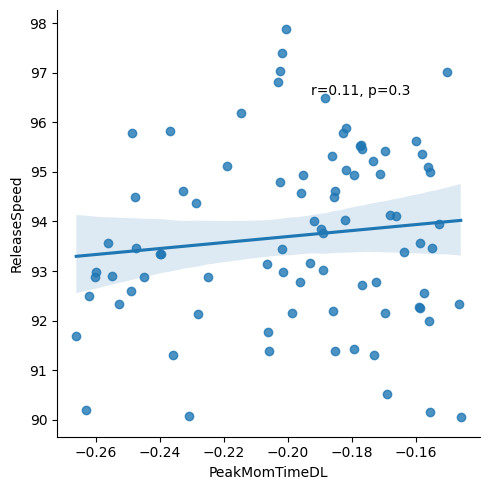

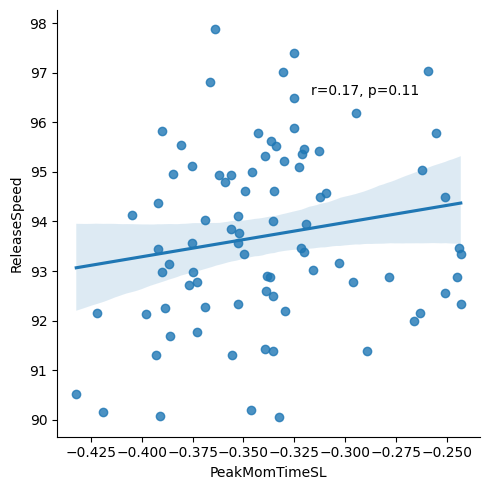

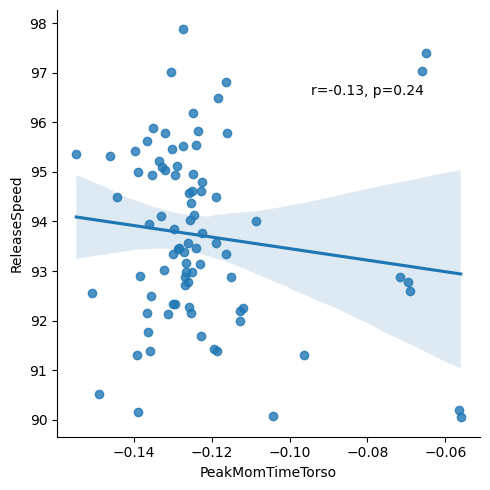

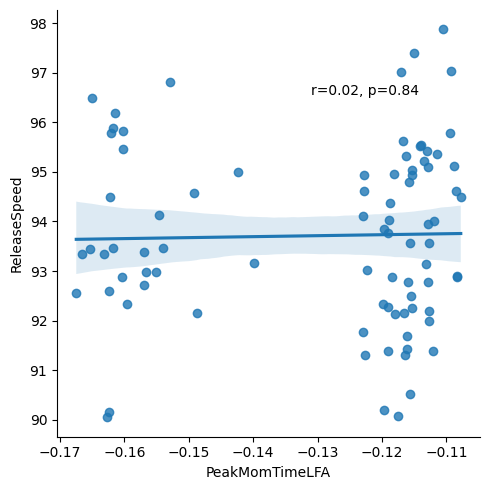

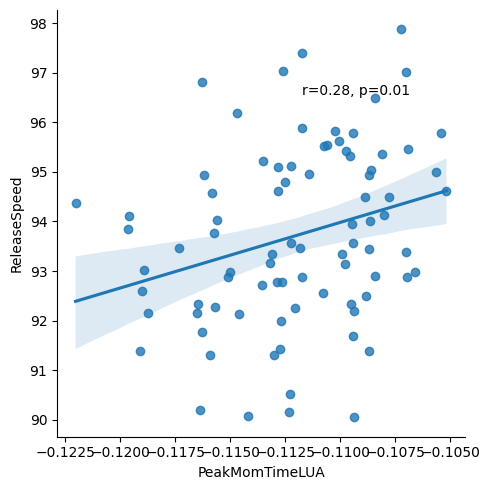

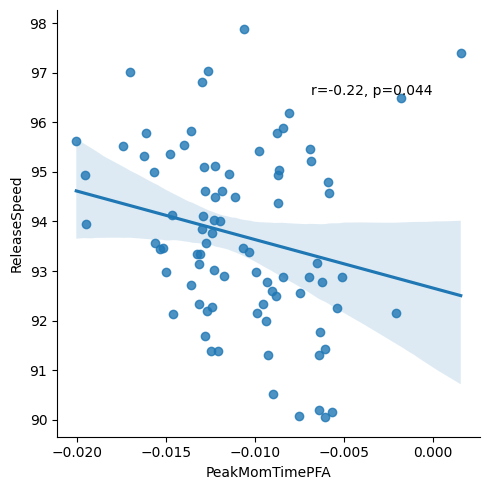

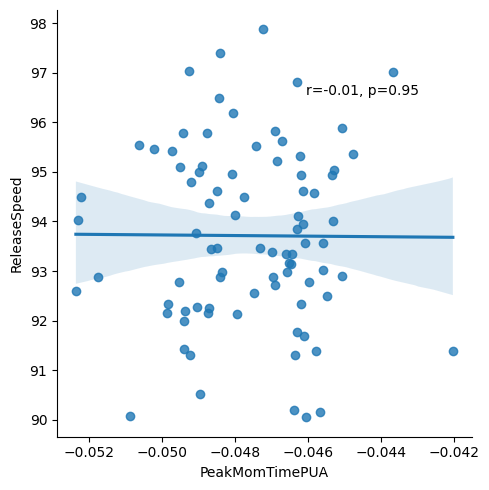

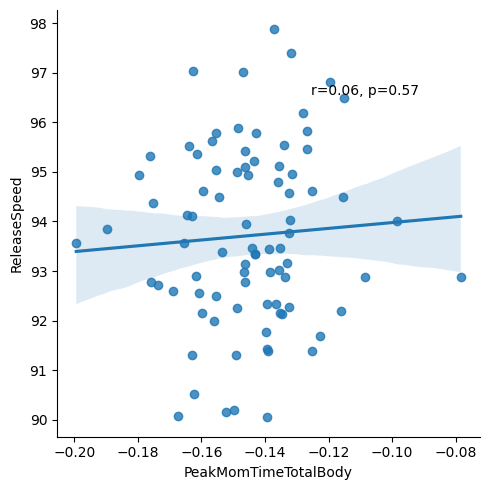

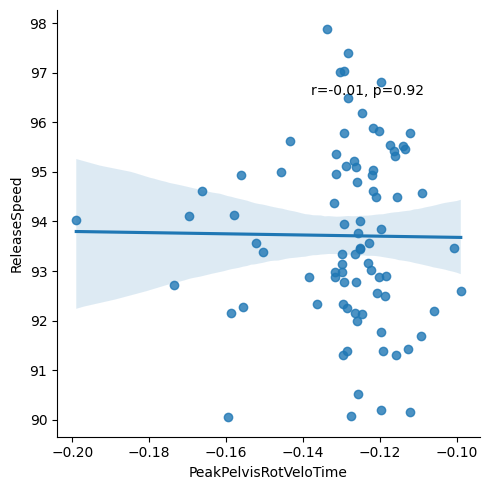

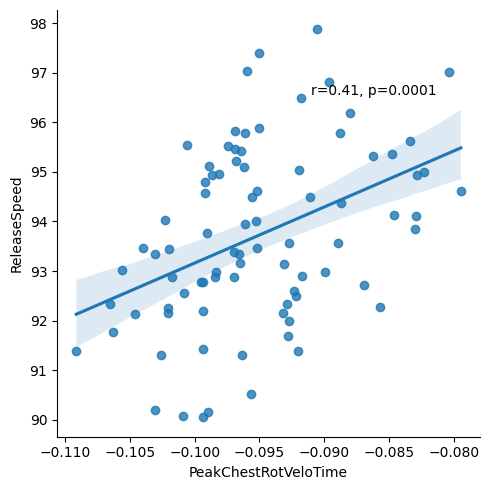

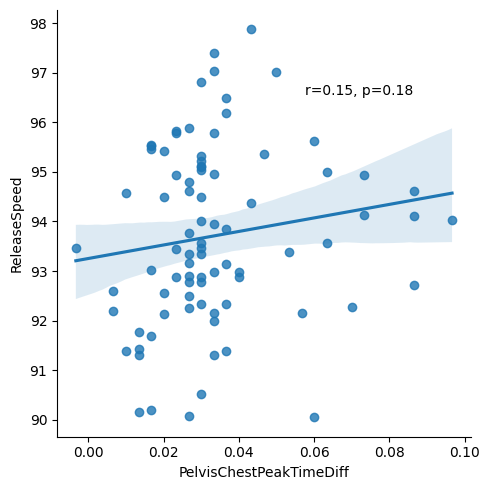

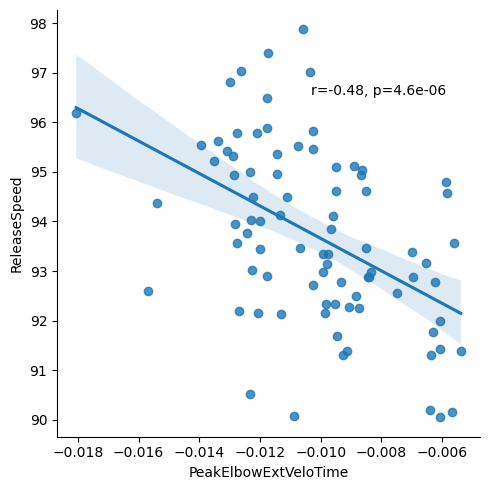

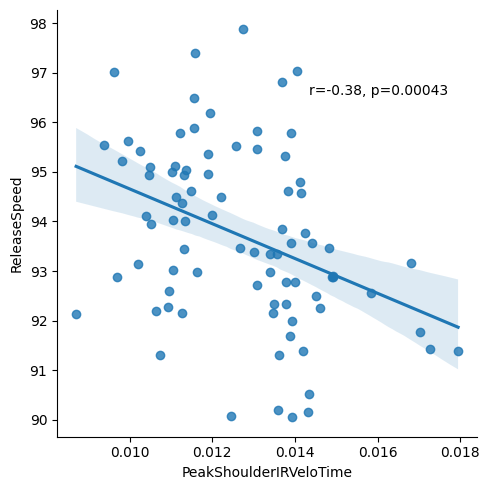

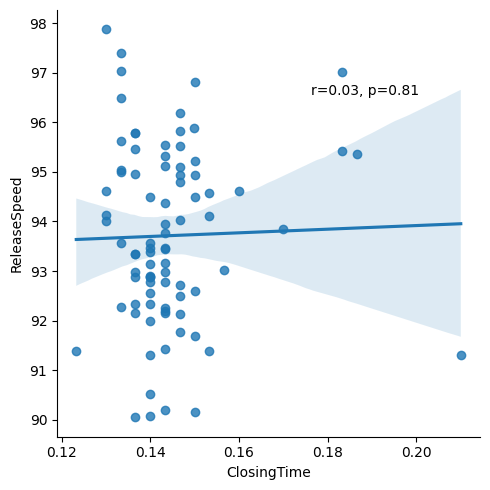

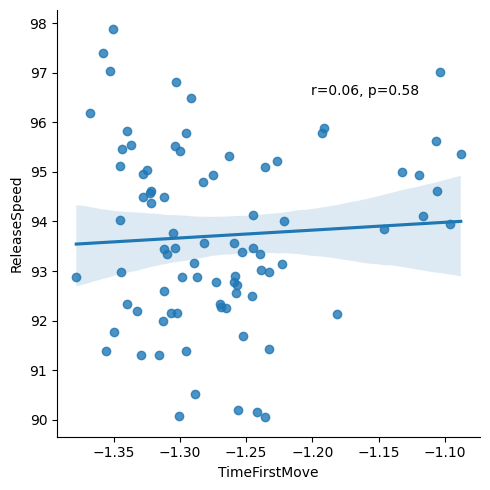

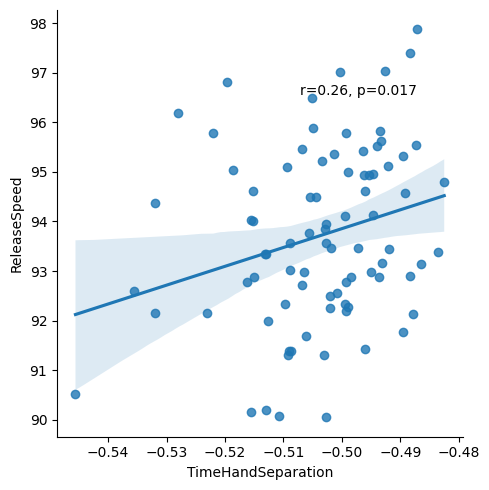

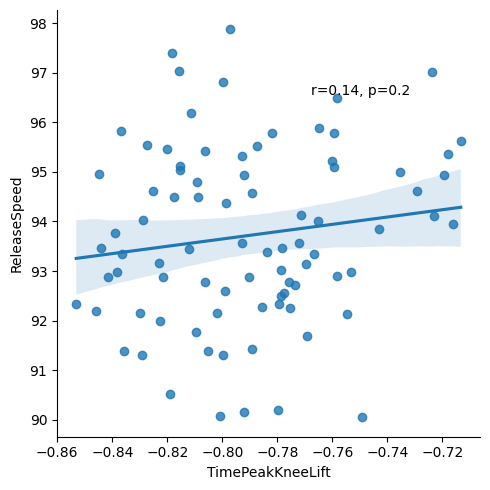

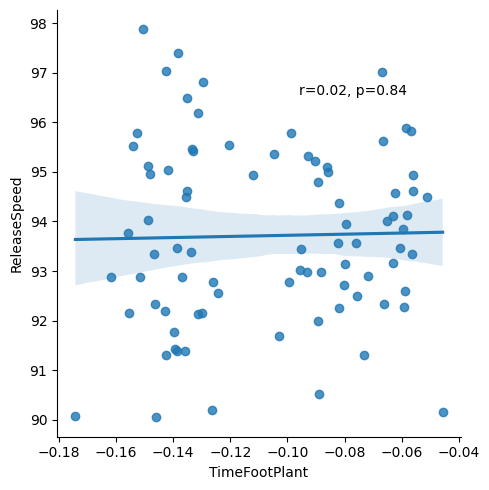

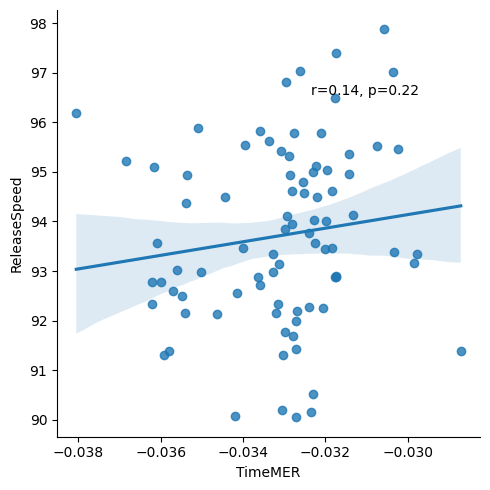

In [18]:
timing_vars = ['PeakMomTimeDL', 'PeakMomTimeSL', 'PeakMomTimeTorso', 'PeakMomTimeLFA', 'PeakMomTimeLUA', 
               'PeakMomTimePFA', 'PeakMomTimePUA', 'PeakMomTimeTotalBody', 'PeakPelvisRotVeloTime','PeakChestRotVeloTime','PelvisChestPeakTimeDiff',
               'PeakElbowExtVeloTime','PeakShoulderIRVeloTime','ClosingTime', 'TimeFirstMove', 'TimeHandSeparation',
               'TimePeakKneeLift', 'TimeFootPlant', 'TimeMER']

for c in timing_vars:
    g = sns.lmplot(x=c, y='ReleaseSpeed', data=fb_data)
    def annotate(data, **kws):
        r, p = sp.stats.pearsonr(fb_data[c], fb_data['ReleaseSpeed'])
        ax = plt.gca()
        ax.text(0.6, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
                transform=ax.transAxes)
    g.map_dataframe(annotate)
    plt.show()

currently just looked at timing variables given in this, but given more time i would like to look at the sequencing. Basically trying to figure out if, for example, is the timing of your chest rotational velocity peaking before timing of any other body part or the timing of your pitching motion 

In [19]:
model = smf.ols("ReleaseSpeed ~ ArmSlotBR + ReleaseExtension + StrideWidth + SLKneeFlexBR + HSSepMin + PeakChestRotVelo + PeakSLKneeExtVelo + PeakPitchHandVeloX + PeakPelvisRotVelo + PeakElbowExtVeloTime + PeakChestRotVeloTime + PeakShoulderIRVeloTime", data=fb_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ReleaseSpeed   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     31.71
Date:                Tue, 28 Nov 2023   Prob (F-statistic):           9.21e-24
Time:                        22:56:02   Log-Likelihood:                -89.907
No. Observations:                  84   AIC:                             205.8
Df Residuals:                      71   BIC:                             237.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 69.2808      8.978      7.717      0.000      51.380      87.181
ArmSlotBR                 -0.0793      0.046     -1.732      0.088      -0.171       0.012
ReleaseExtension           1.2140      0.481      2.522      0.014       0.254       2.174
StrideWidth               -2.2487      0.817     -2.752      0.008      -3.878      -0.619
SLKneeFlexBR              -0.0616      0.027     -2.311      0.024      -0.115      -0.008
HSSepMin                  -0.1288      0.042     -3.103      0.003      -0.212      -0.046
PeakChestRotVelo           0.0032      0.002      1.462      0.148      -0.001       0.008
PeakSLKneeExtVelo         -0.0040      0.002     -2.025      0.047      -0.008   -6.25e-05
PeakPitchHandVeloX         0.2380      0.098      2.435      0.017       0.043       0.433
PeakPelvisRotVelo          0.0040      0.002      2.318      0.023       0.001       0.007
PeakElbowExtVeloTime     -19.0750     44.396     -0.430      0.669    -107.597      69.447
PeakChestRotVeloTime      91.3253     18.488      4.940      0.000      54.461     128.189
PeakShoulderIRVeloTime    20.3676     59.604      0.342      0.734     -98.479     139.214
==============================================================================
Omnibus:                        5.973   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                2.645
Skew:                           0.085   Prob(JB):                        0.266
Kurtosis:                       2.148   Cond. No.                     9.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""